In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings("ignore")


In [2]:
import acquire as acq
import prepare as prep

from debug import local_settings, timeifdebug, timeargsifdebug, frame_splain
from acquire import get_telco_data
from prepare import DFO

In [3]:
local_settings.splain=True

In [4]:
local_settings.debug=True

In [18]:
splain = local_settings.splain
debug = local_settings.debug

In [19]:
    df = get_telco_data(splain=splain)
    df.set_index('customer_id')
    dfo = prep.set_dfo(dfo_df=df, y_column='churn', splain=True)


starting get_telco_data
starting sql_df
starting get_db_url
ending get_db_url ; time: 6.198883056640625e-05
starting check_df
DATAFRAME SHAPE:
(7043, 32) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null int64
dependents                  7043 non-null int64
partner_deps_id             7043 non-null int64
partner_deps                7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null int64
multiple_lines              7043 non-null int64
internet_service_type_id    7043 non-null int64
internet_service_type       7043 non-null object
internet_service            7043 non-null int64
has_dsl                     7043 non-null int64
has_fiber                   7043 non-null int

In [6]:
df = dfo_telco.df

In [7]:
category_cols=[
    'partner_deps_id',
    'partner_deps',
    'gender',
    'contract_type_id',
    'internet_service_type_id',
    'internet_service_type',
    'contract_type',
    'payment_type_id',
    'payment_type'
]

category_cols

['partner_deps_id',
 'partner_deps',
 'gender',
 'contract_type_id',
 'internet_service_type_id',
 'internet_service_type',
 'contract_type',
 'payment_type_id',
 'payment_type']

In [8]:
df_dtypes = pd.DataFrame(df.dtypes).rename(columns={0:'dtype'}).reset_index()
df_dtypes

,index,dtype
0,customer_id,object
1,gender,object
2,senior_citizen,int64
3,partner,int64
4,dependents,int64
5,partner_deps_id,int64
6,partner_deps,object
7,tenure,int64
8,phone_service,int64
9,multiple_lines,int64


In [22]:
for row in np.arange(len(df_dtypes)):
    if df_dtypes.loc[row, 'index'] in category_cols:
        df_dtypes.loc[row, 'dtype'] = 'category'

dict_dtypes = {}
for row in np.arange(len(df_dtypes)):
    dict_dtypes[df_dtypes.loc[row,'index']] = df_dtypes.loc[row, 'dtype'] 

print(dict_dtypes)

{'customer_id': dtype('O'), 'gender': 'category', 'senior_citizen': dtype('int64'), 'partner': dtype('int64'), 'dependents': dtype('int64'), 'partner_deps_id': 'category', 'partner_deps': 'category', 'tenure': dtype('int64'), 'phone_service': dtype('int64'), 'multiple_lines': dtype('int64'), 'internet_service_type_id': 'category', 'internet_service_type': 'category', 'internet_service': dtype('int64'), 'has_dsl': dtype('int64'), 'has_fiber': dtype('int64'), 'online_security': dtype('int64'), 'online_backup': dtype('int64'), 'device_protection': dtype('int64'), 'tech_support': dtype('int64'), 'streaming_tv': dtype('int64'), 'streaming_movies': dtype('int64'), 'contract_type_id': 'category', 'contract_type': 'category', 'on_contract': dtype('int64'), 'contract_duration': dtype('int64'), 'paperless_billing': dtype('int64'), 'payment_type_id': 'category', 'payment_type': 'category', 'auto_pay': dtype('int64'), 'monthly_charges': dtype('float64'), 'total_charges': dtype('float64'), 'churn':

In [10]:
df = df.astype(dict_dtypes)

In [20]:
df.dtypes

customer_id                  object
gender                       object
senior_citizen                int64
partner                       int64
dependents                    int64
partner_deps_id               int64
partner_deps                 object
tenure                        int64
phone_service                 int64
multiple_lines                int64
internet_service_type_id      int64
internet_service_type        object
internet_service              int64
has_dsl                       int64
has_fiber                     int64
online_security               int64
online_backup                 int64
device_protection             int64
tech_support                  int64
streaming_tv                  int64
streaming_movies              int64
contract_type_id              int64
contract_type                object
on_contract                   int64
contract_duration             int64
paperless_billing             int64
payment_type_id               int64
payment_type                

In [21]:
frame_splain(df, splain=True)

DATAFRAME SHAPE:
(7043, 32) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null int64
dependents                  7043 non-null int64
partner_deps_id             7043 non-null int64
partner_deps                7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null int64
multiple_lines              7043 non-null int64
internet_service_type_id    7043 non-null int64
internet_service_type       7043 non-null object
internet_service            7043 non-null int64
has_dsl                     7043 non-null int64
has_fiber                   7043 non-null int64
online_security             7043 non-null int64
online_backup               7043 non-null int64
device_protection          

starting heatmap_train


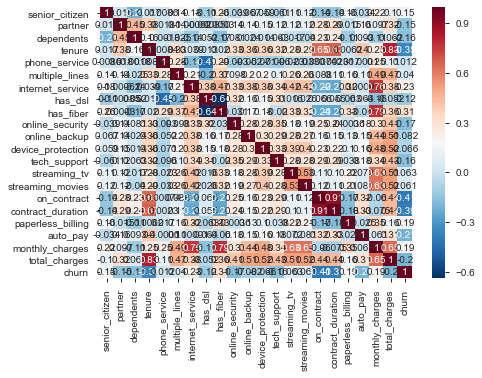

ending heatmap_train ; time: 2.0528838634490967


In [13]:
prep.heatmap_train(df, show_now=True)

starting pairplot_train


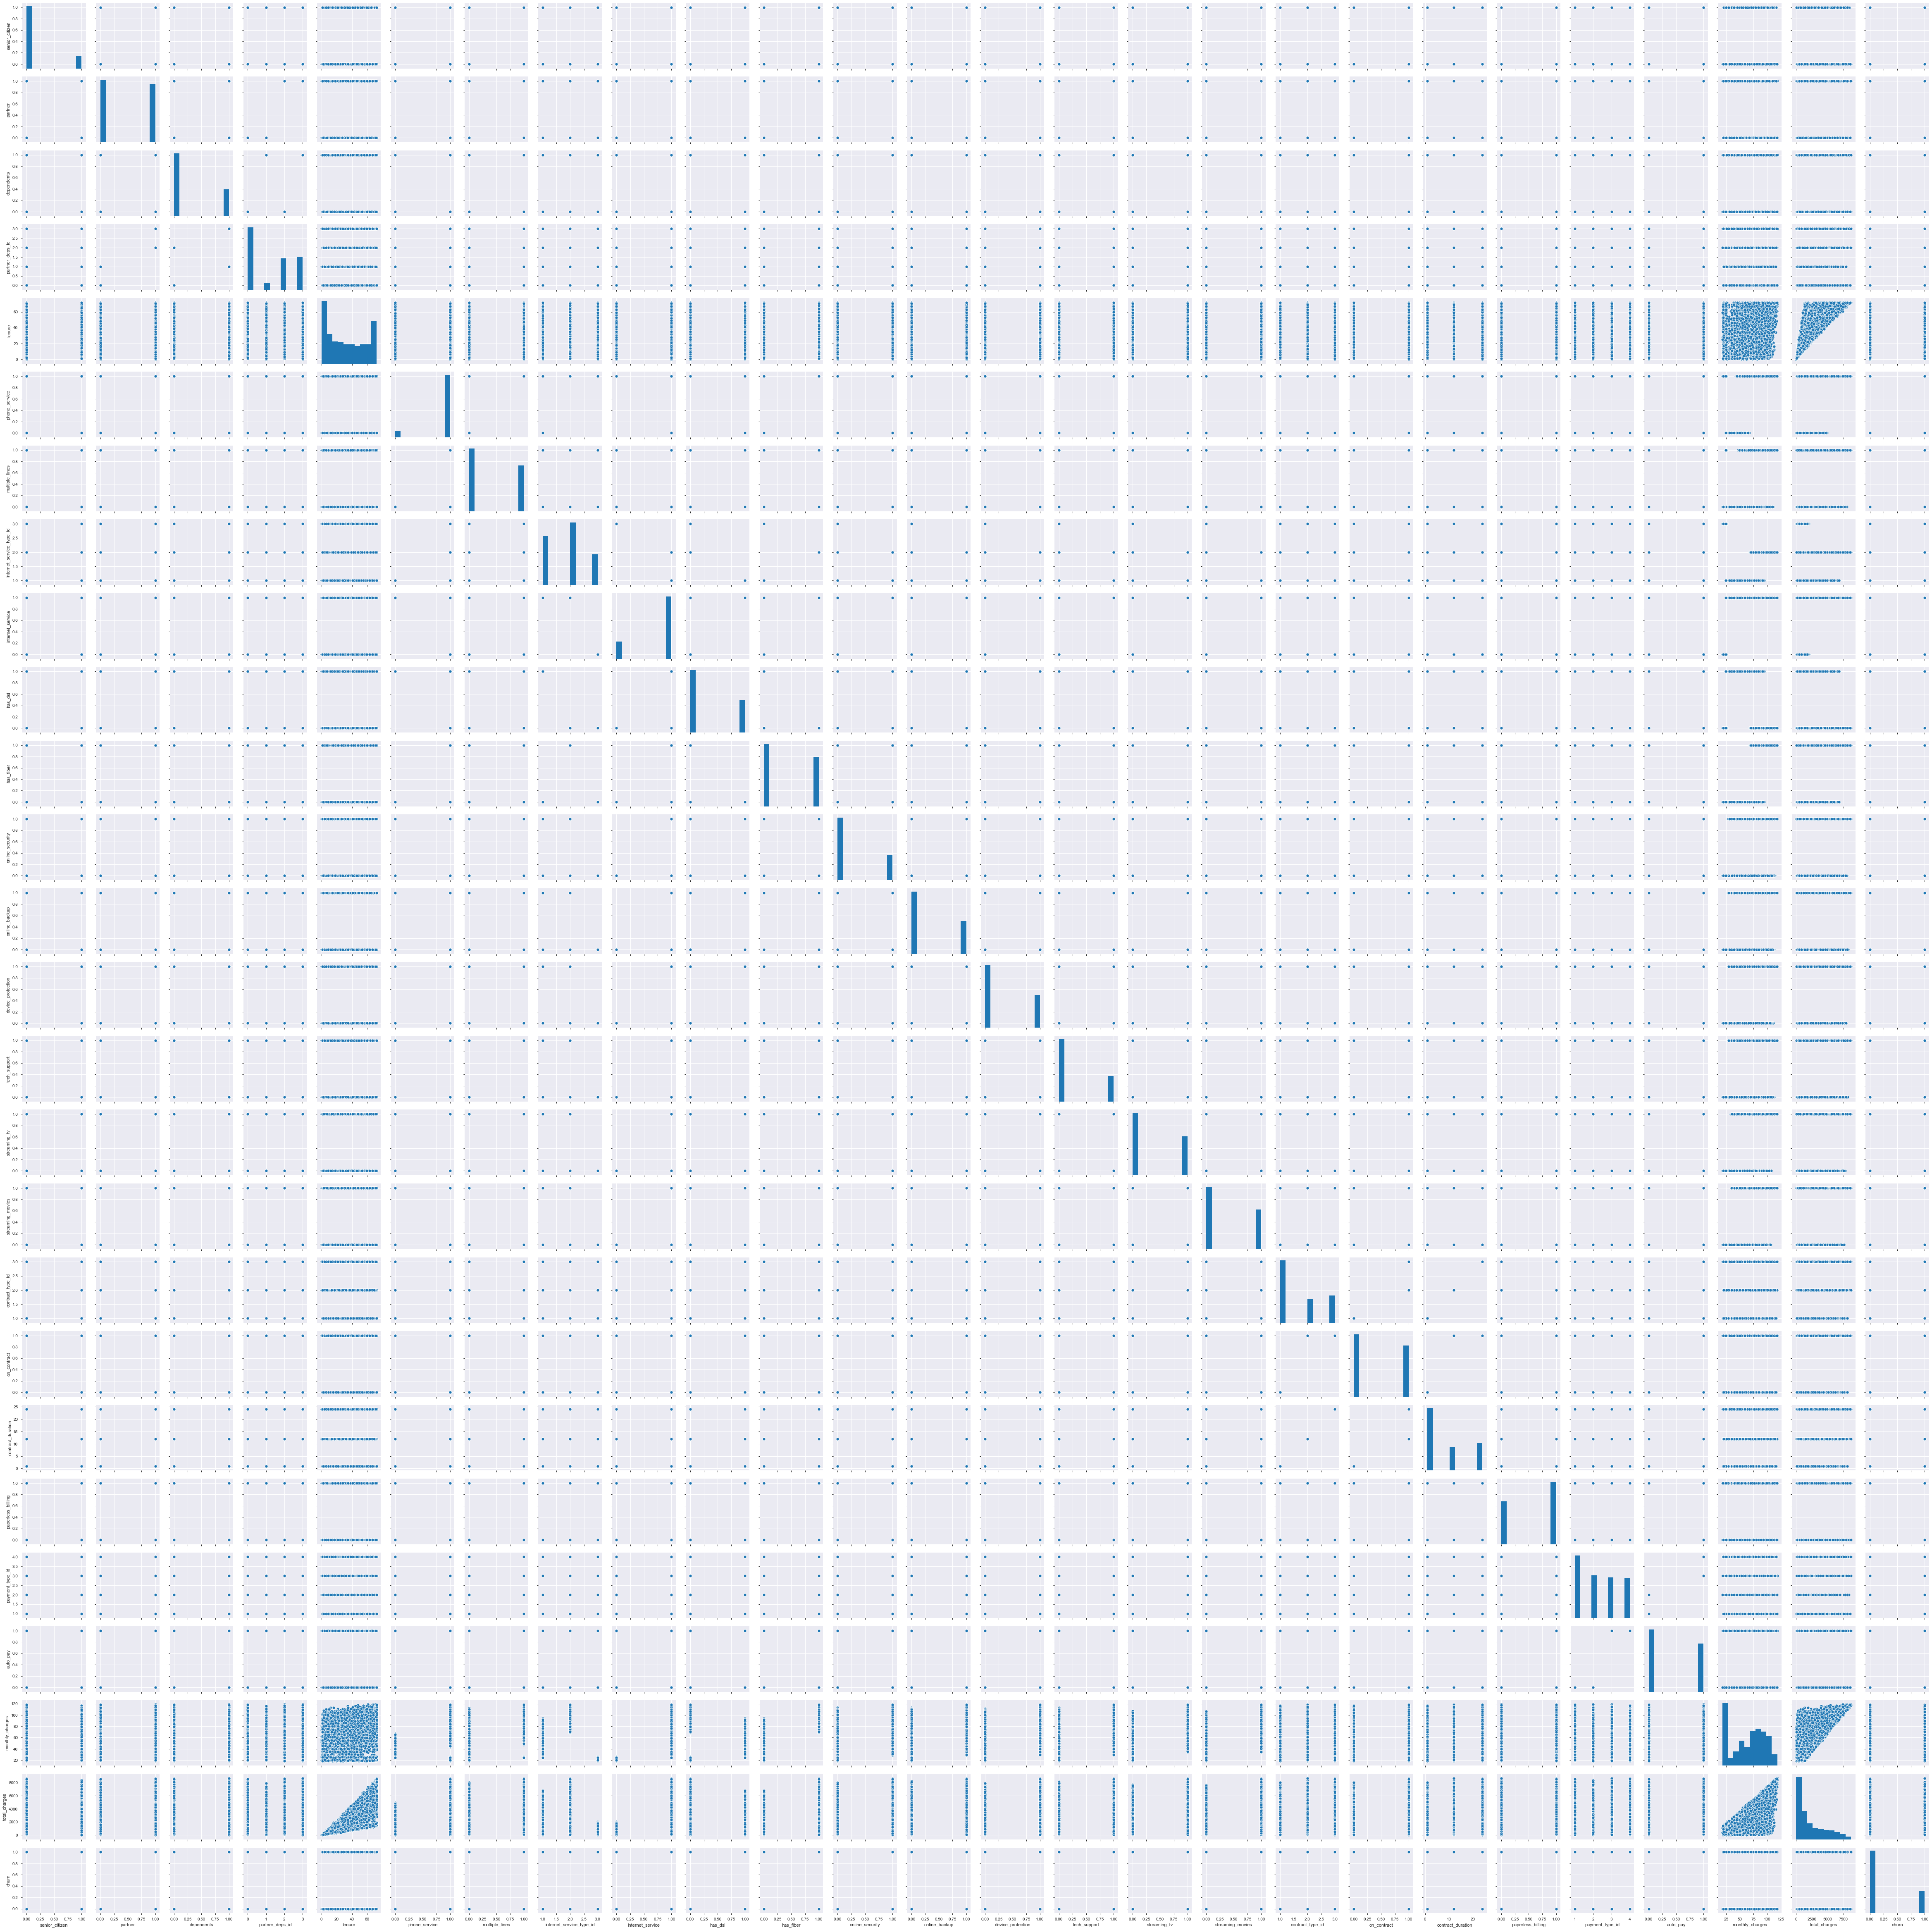

ending pairplot_train ; time: 292.77065896987915


In [14]:
prep.pairplot_train(df, show_now=True)

In [15]:
frame_splain(df, splain=True)

DATAFRAME SHAPE:
(7043, 32) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customer_id                 7043 non-null object
gender                      7043 non-null category
senior_citizen              7043 non-null int64
partner                     7043 non-null int64
dependents                  7043 non-null int64
partner_deps_id             7043 non-null category
partner_deps                7043 non-null category
tenure                      7043 non-null int64
phone_service               7043 non-null int64
multiple_lines              7043 non-null int64
internet_service_type_id    7043 non-null category
internet_service_type       7043 non-null category
internet_service            7043 non-null int64
has_dsl                     7043 non-null int64
has_fiber                   7043 non-null int64
online_security             7043 non-null int64
online_backup               7043 non-null int64
device_protecti

In [16]:
type(df)

pandas.core.frame.DataFrame